# SVM Support Vector Machine 

* SVM
    - classification에서 가장 주류 모델

* 초평면
    - hyperplane
    - 두 데이터 그룹을 구분하는 선(사실 면임) 
    - 초평면을 화살표로 표시된 법선 벡터 방향으로 움직였을 때 데이터에 닿지 않는 폭이 넓을 수록 좋은 분류

* 마진
    - margin
    - 초평면이 데이터에 닿지 않는 폭
    - 마진이 넓을 수록 좋은 분류
    - 하드 마진 
        - hard margin
        - 어떠한 데이터도 마진내에 들어오지 않는 엄격하게 지켜야하는 마진
        - 데이터가 들어오지 않게 초평면이 구불구불하게 데이터를 피해간다.
        - 분류가 안될수 있다.
        - 잡음에 민감 = 데이터 과적합
    - 소프트 마진
        - soft margin
        - 일부 데이터가 마진 내에 들어와도 허용
        - 그룹별로 n개씩 허용
            - N : 슬랙 slack
        - 사용하는게 더 좋다.
    - 서포트 벡터
        - support vector
        - 마진의 양쪽에 서로 다른 그룹에 속하는 데이터들이 하나씩 닿은 것
    - 마진의 넓이 (손실 함수)
        - 클수록 좋다.
        - 분리 평면 h = Wt * X + b
        - 분류 기능을 하면서 마진이 가장 큰 w를 찾는다.
        - w가 커질수록 (기울기가 커질수록) 마진이 작아진다.
        - w가 작아질수록 (기울기가 낮아질수록) 마진이 커진다.

* 슬랙
    - slack
    - 마진 안에 들어온 데이터의 수
    - 좋은 분류는 슬랙 변수를 최소로 만드는 것
    
* 손실함수
    - SVM의 손실함수는 마진의 기울기값 + 슬랙 (Wt * X + C * 슬랙변수)
        - C가 작으면 슬랙변수를 덜 신경쓴다 : 과소적합이 생긴다.

* C, gamma를 이용해 과소적합, 과대적합에 대해 자유롭게 조절가능하다.
* 딥러닝을 쓸 수 없을 때 많이 쓰인다.

In [1]:
# SVM 예제

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

# 4개 특성, 1개 정답, 150개 데이터

In [2]:
X = iris.data
y = iris.target

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_sc = scaler.fit_transform(X[:, [0, 2]])

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', C = 1, random_state = 1) # 선형 SVM, C : 슬랙변수 제어변수

svc.fit(X_sc, y)

SVC(C=1, kernel='linear', random_state=1)

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


C:\Users\PC\AppData\Local\Temp\ipykernel_2200\2875022574.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_2200\2875022574.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


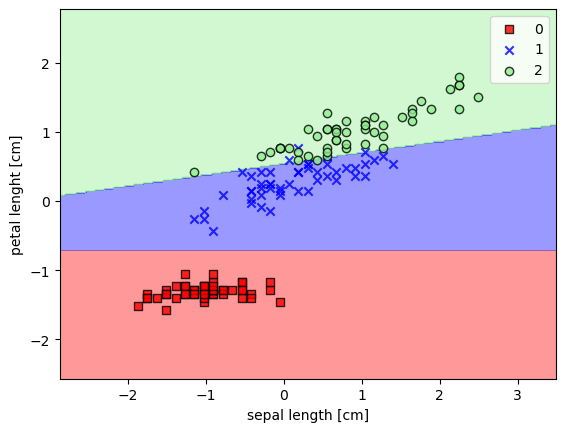

In [10]:
plot_decision_regions(X_sc, y, svc)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

# 선형회귀랑 비슷, 최대한 데이터와 거리를 두는 선, 

# 비선형 SVM

* 선형으로 데이터를 분류하지 못하는 경우 비선형 SVM 사용
* PolynomialFeatures는 데이터 정제 단계이므로 학습 알고리즘에 관계없이 쓸 수 있음
* SVM 내부에 데이터 공간을 휘고 펴고 할 수 있게 되어있다.

In [21]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', C = 1, random_state = 1, gamma = 100) # kernel (linear : 선형, poly : 다항식, rbf : poly 개선판, sigmoid : tan처럼 생긴 함수, precomputed), C : 슬랙변수 제어변수
                                                    # gamma 데이터에 따라 차원이 달라진다, 작게하면 차원이 낮아지고 과소적합이생기고 과대적합 방지가된다.
svc.fit(X_sc, y)

SVC(C=1, gamma=100, random_state=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_2200\2875022574.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_2200\2875022574.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


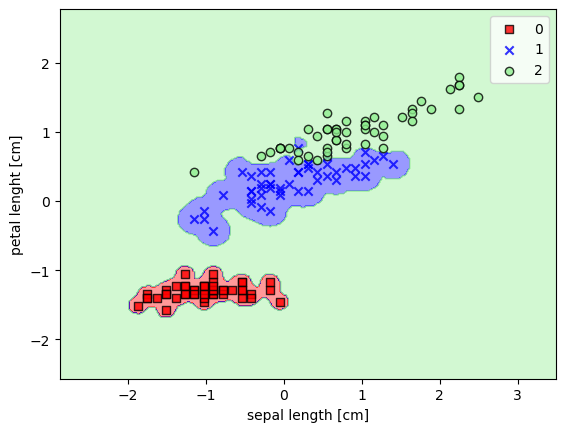

In [22]:
plot_decision_regions(X_sc, y, svc)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

# C, gamma를 이용해 과소적합, 과대적합에 대해 자유롭게 조절가능하다.
# 딥러닝을 쓸 수 없을 때 많이 쓰인다.

In [ ]:
# 어떤